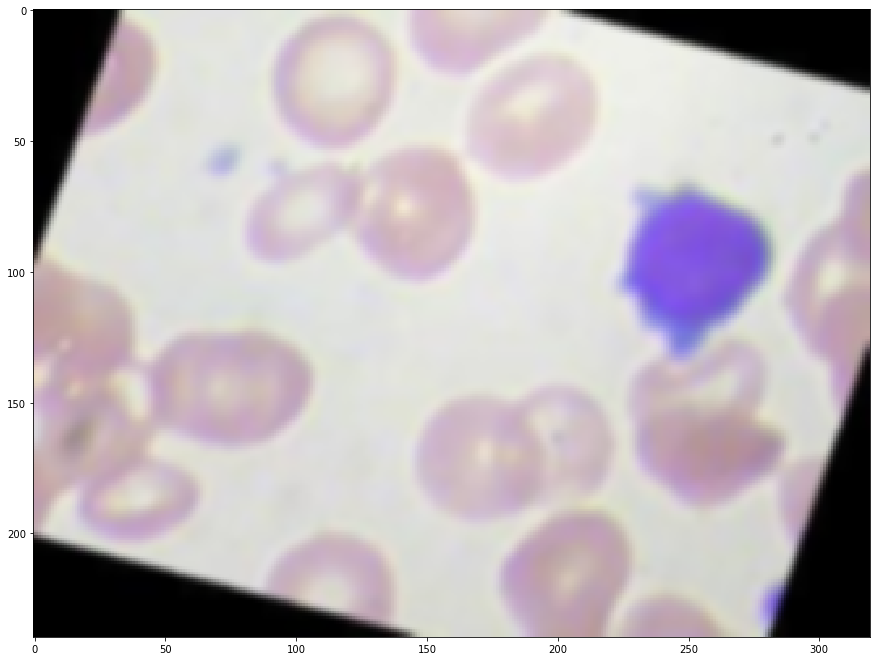

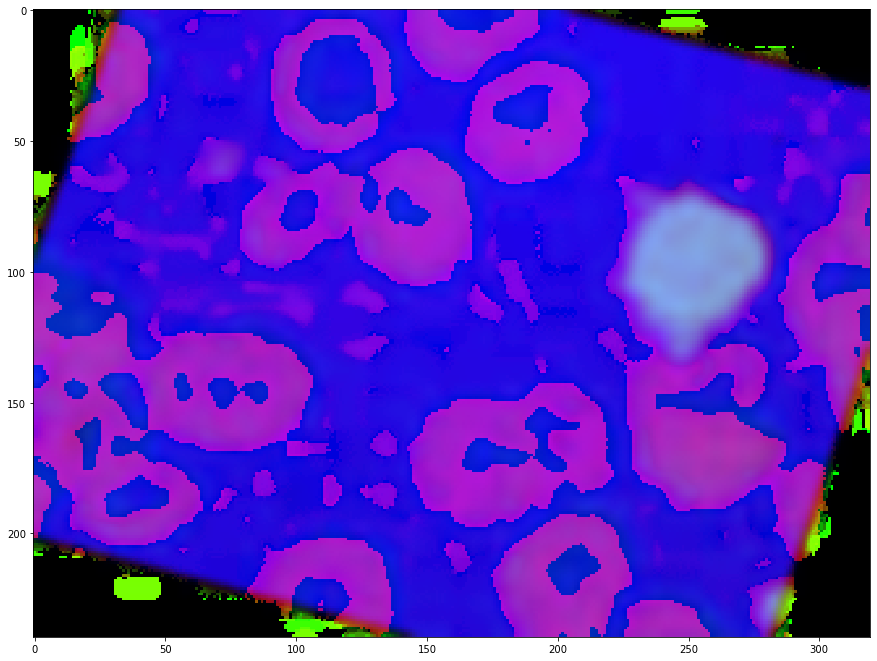

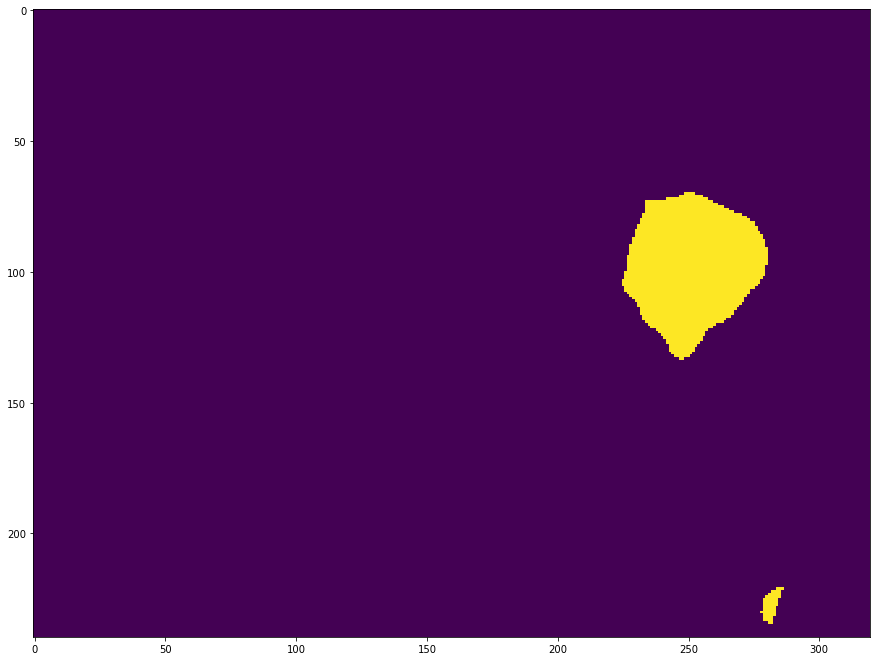

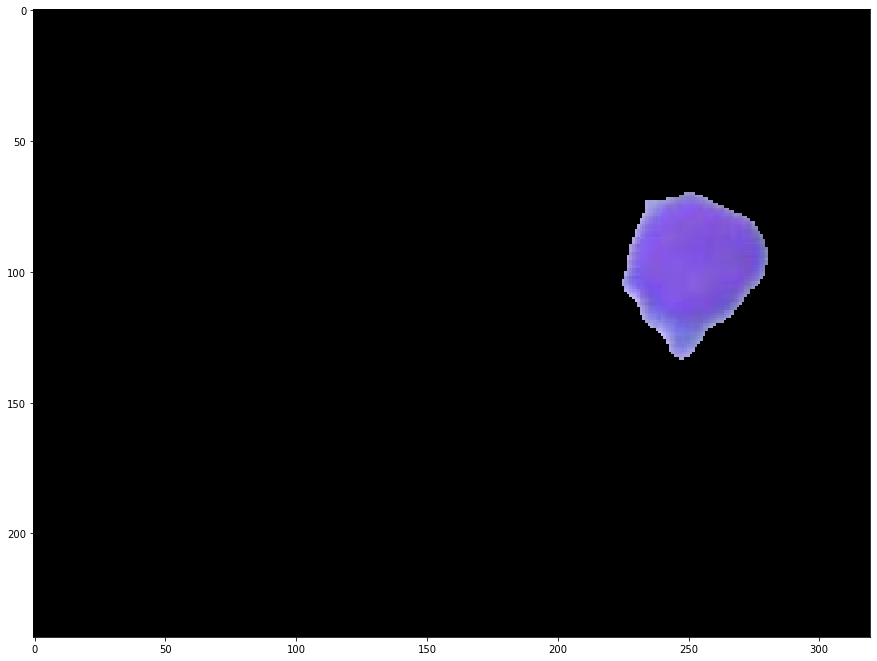

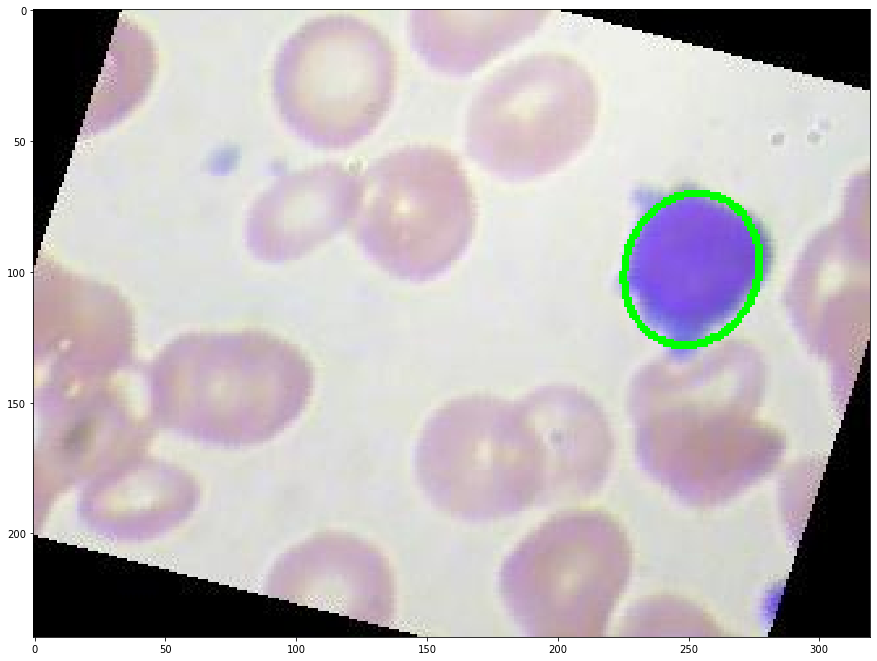

In [9]:
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
import os
import glob

def find_biggest_contour(image):
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    biggest_contour = max(contours, key=cv2.contourArea)
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
def show(image):
    plt.figure(figsize=(15, 15))
    plt.imshow(image, interpolation='nearest')
    plt.show()

im = cv2.imread(r"Downloads\_0_278.jpeg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

image_blur = cv2.GaussianBlur(im, (7, 7), 0)
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
min_red = np.array([80, 60, 140])
max_red = np.array([255, 255, 255])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)
show(image_blur)
cv2.imwrite(os.path.join(r'G:\Class 4',"image_blur" +'.png'),image_blur)
show(image_blur_hsv)
cv2.imwrite(os.path.join(r'G:\Class 4',"image_blur_hsv" +'.png'),image_blur_hsv)
show(image_red1)
cv2.imwrite(os.path.join(r'G:\Class 4',"image_red1" +'.png'),image_red1)
big_contour, mask = find_biggest_contour(image_red1)
overlay_mask(mask,im)

moments = cv2.moments(mask)
centre_of_mass = (
    int(moments['m10'] / moments['m00']),
    int(moments['m01'] / moments['m00'])
)
image_with_com = im.copy()

cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1, cv2.LINE_AA)
image_with_ellipse = im.copy()
ellipse = cv2.fitEllipse(big_contour)
#cv2.imwrite(os.path.join(r'G:\Class 4',"ellipse"+'.png'),ellipse)

img =cv2.ellipse(image_with_ellipse, ellipse, (0, 255, 0), 2)
dst= cv2.bitwise_and(im,im,mask=mask)
show(dst)
cv2.imwrite(os.path.join(r'G:\Class 4',"dst" +'.png'),dst)
r = 100.0 / dst.shape[1]
dim = (100, int(dst.shape[0] * r))
 

resized = cv2.resize(dst, dim, interpolation = cv2.INTER_AREA)
cv2.imwrite(os.path.join(r'G:\Class 4',"resized"+'.png'),image_with_ellipse)
show(image_with_ellipse)

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np

def find_biggest_contour(image):
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    biggest_contour = max(contours, key=cv2.contourArea)
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
def show(image):
    plt.figure(figsize=(15, 15))
    plt.imshow(image, interpolation='nearest')
    plt.show()
#-----------------------------------------opaning + gamma + clahe + bilateralFilter --------------------------------------------------
input = r'I:\images\TEST\EOSINOPHIL'
i = 0

for im in os.listdir(input):  
    path = os.path.join(input,im)
    img = cv2.imread(path) 
    im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    image_blur = cv2.GaussianBlur(im, (7, 7), 0)
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)
    min_red = np.array([80, 60, 140])
    max_red = np.array([255, 255, 255])
    image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)
    #show(image_blur)
    #show(image_blur_hsv)
    #show(image_red1)
    big_contour, mask = find_biggest_contour(image_red1)
    overlay_mask(mask,im)

    moments = cv2.moments(mask)
    centre_of_mass = (
        int(moments['m10'] / moments['m00']),
        int(moments['m01'] / moments['m00'])
    )
    image_with_com = im.copy()

    cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1, cv2.LINE_AA)
    image_with_ellipse = im.copy()
    try:
        ellipse = cv2.fitEllipse(big_contour)
    except:
        i=i+1
        continue




    img =cv2.ellipse(image_with_ellipse, ellipse, (0, 255, 0), 2)
    dst= cv2.bitwise_and(im,im,mask=mask)
   
    cv2.imwrite(os.path.join(r'I:\seg\TEST\EOSINOPHIL',"EOSINOPHIL " +str(i)+'.png'),dst)
    i += 1
print("success")

success


In [ ]:
import torch